<a href="https://colab.research.google.com/github/CMviking2003/comp215/blob/main/lab05_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 5
----------------
#### Name(s): Christian Mancuso
#### Date: Febuary 1, 2025


By the end of this lab you should be able to:
  * apply both a direct (ie. brute force) and heuristic algorithm to a problem
  * use the networkx module to visualize graphs
  * measure algorithm scaling


During this lab, you will be introduced to the following:
  * seeding the random module



## The Traveling Salesperson Problem

This lab is based on the famous Traveling Salesperson Problem (TSP) outlined in Section 3.3.2 of 'On Complexity'.  Imagine you needed to travel to ten different cities.  What is the sortest possible route you could take to visit every city?  For our version of the problem, you start from a specific city and must end on the same city.

In this lab, you will implement a direct (ie. brute force) and a heuristic solution to the problem.

In [ ]:
# start with some imports
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

## Set up the map

For this implementation of the problem we will randomly place N cities on a 100 by 100 grid.  Cities will be labelled using a single character; 'A', 'B', 'C', etc.  City locations will be denoted by a 2-tuple, `(x,y)`, giving their position on the grid. In order to create reproducable maps, we will use [random.seed()](https://docs.python.org/3/library/random.html#random.seed) to initialize the random module.  

In [ ]:
def setup_map(N, seed=1):
  ''' Returns a map of N cities with random locations on a 100 by 100 grid '''
  random.seed(seed)
  city_locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(N)]
  city_names = [chr(65 + i) for i in range(N)]
  city_map = dict(zip(city_names, city_locations))
  return city_map

def graph_map(city_map):
  ''' graph the map of cities using networkx'''
  G = nx.Graph()
  G.add_nodes_from(city_map)
  nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
  ''' Returns the distance between two cities on a map'''
  x1, y1 = city_map[city1]
  x2, y2 = city_map[city2]
  return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),1)

def calculate_distances(city_map):
  ''' Returns a dictionary with the distances between all pairs of cities in a map '''
  distances = {}
  for city1 in city_map:
      for city2 in city_map:
          if city1 != city2:
              # this will have duplicate distances (A,B) and (B,A)
              # these duplicates make the algorithm implememntation simpler
              distances[(city1, city2)] = distance(city1, city2, city_map)
  return distances


City Map: {'A': (17, 72), 'B': (97, 8), 'C': (32, 15), 'D': (63, 97), 'E': (57, 60), 'F': (83, 48), 'G': (100, 26), 'H': (12, 62), 'I': (3, 49), 'J': (55, 77)}
Distances between cities: {('A', 'B'): 102.4, ('A', 'C'): 58.9, ('A', 'D'): 52.4, ('A', 'E'): 41.8, ('A', 'F'): 70.2, ('A', 'G'): 94.9, ('A', 'H'): 11.2, ('A', 'I'): 26.9, ('A', 'J'): 38.3, ('B', 'A'): 102.4, ('B', 'C'): 65.4, ('B', 'D'): 95.3, ('B', 'E'): 65.6, ('B', 'F'): 42.4, ('B', 'G'): 18.2, ('B', 'H'): 100.7, ('B', 'I'): 102.6, ('B', 'J'): 80.8, ('C', 'A'): 58.9, ('C', 'B'): 65.4, ('C', 'D'): 87.7, ('C', 'E'): 51.5, ('C', 'F'): 60.7, ('C', 'G'): 68.9, ('C', 'H'): 51.1, ('C', 'I'): 44.7, ('C', 'J'): 66.1, ('D', 'A'): 52.4, ('D', 'B'): 95.3, ('D', 'C'): 87.7, ('D', 'E'): 37.5, ('D', 'F'): 52.9, ('D', 'G'): 80.1, ('D', 'H'): 61.9, ('D', 'I'): 76.8, ('D', 'J'): 21.5, ('E', 'A'): 41.8, ('E', 'B'): 65.6, ('E', 'C'): 51.5, ('E', 'D'): 37.5, ('E', 'F'): 28.6, ('E', 'G'): 54.8, ('E', 'H'): 45.0, ('E', 'I'): 55.1, ('E', 'J'): 17.1,

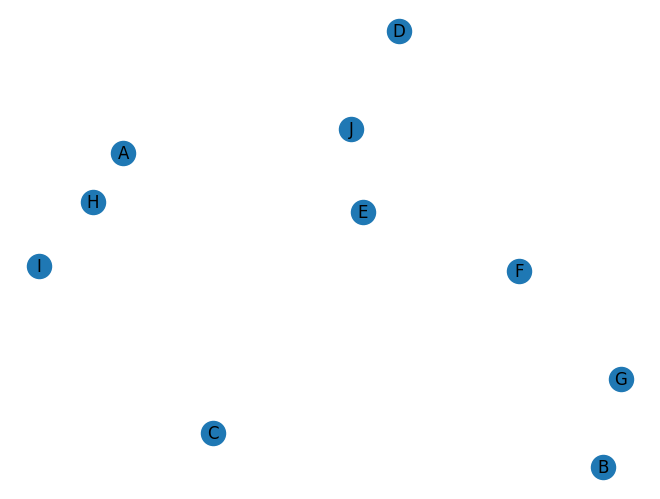

In [ ]:
# test our setup functions
city_map = setup_map(10)
print(f'City Map: {city_map}')
distances = calculate_distances(city_map)
print(f'Distances between cities: {distances}')
graph_map(city_map)

### Exercise 1: The Brute Force Solution

Implement a brute force solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the brute force solution looks something like this:
 1. Loop over every possible route that starts and ends on city A.  For a three city example, this would be ABCA, ACBA.  
 2. Calculate the total distance of each possible route.  
 3. Find the route with the minimum total distance.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [ ]:
# Ex. 1 your solution here

#1 LOOP every POSSIBLE ROUTE that ENDS ON CITY A

#2 Calculate the TOTAL DISTANCE of each possible route

#3 Find route with the MINIMUM TOTAL DISTANCE


def possible_routes(city_map):

  #MAKE DICTONARY FROM CITIES AND CORDINATES

  locations = {}

  cities = list(city_map.keys())

  cities.remove('A')

  routes = itertools.permutations(cities, 2)


  pos_routes = [('A',) + route + ('A',) for route in routes]


  total_route_diss = 0
  minDistance = 100000


  for route in pos_routes:


    route_diss = sum(distance(city_map[route[i]], city_map[route[i + 1]]) for i in range(len(route) - 1))

    #assert route_diss == 226.70000000000002

    if route_diss < minDistance:
      minDistance = route_diss



    #print(f" Distance of Route {route}: {route_diss}")



  #print(f"Minimum Total Distance is {minDistance}")
  assert minDistance == 131.7



possible_routes(city_map)











### Exercise 2: Nearest Neighbour

Implement a nearest neighbour solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the nearest neighbour solution looks something like this:
 1. Start from the starting city.  
 2. Go to the nearest city that has not been visited.  
 3. Repeat steps 1 and 2 until all cities have been visited.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [ ]:
# Ex.2 your code heredistances = calculate_distances(city_map)

def distance(start_city, next_city):
  ''' Returns the distance between two cities on a map'''

  x1, y1 = start_city
  x2, y2 = next_city
  return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),1)

def Nearest_Neighbour(city_map):

  city_map = setup_map(10)

  unvisited = list(city_map.keys())


  visited = []

  start = unvisited[0]
  visited.append(start)
  unvisited.remove(start)

  #DIJKSTRAS ALGORITHM
  while unvisited:

    nextCity = None #resets next or nearest city for every iteration to None to ensure that loop doesnt repeately iterate over same city
    minDistance = 10000000 #resets minDistance after minDistance is found for specific nearest neighbour


    for aCity in unvisited:

      city_diss = distance(city_map.get(start), city_map[aCity])


      #Determine Minimum Distance to Find Closest City
      if city_diss < minDistance:
        minDistance = city_diss
        nextCity = aCity
        #print(f"City distance between {start} and  {nextCity}: {minDistance}")

    if nextCity:
      visited.append(nextCity)
      unvisited.remove(nextCity)
      start = nextCity


  #print(visited)


print(Nearest_Neighbour(city_map))


None


### Exercise 3: Graph the Routes

Use the networkx module to create directed graphs of the routes (brute force and nearest neighbour).  Include the distances between the cities on the edges.  Run several different map setups with a different sizes (ie. number of cities).  Do the brute force (ie. direct) and nearest neighbour (ie. heuristic) algorithms always give the same solution?  Do you notice anything about the brute force solutions that suggests an alternative heuristic algorithm?


In [ ]:
# Ex.3 your code here


def graph_possibleRoutes(city_map):

    G = nx.DiGraph()
    pos = city_map


    for aCity in city_map:


        G.add_node(aCity, pos=city_map[aCity])


    routes = possible_routes(city_map)
    labels = {}


    for route, distance in routes:

        for i in range(len(route) - 1):

            start, end = route[i], route[i + 1]
            dist = distance(city_map[start], city_map[end])
            G.add_edge(start, end, weight=dist)
            labels[(start, end)] = dist


    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color = "purple", font_size=10, edge_color = "red", arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Bruting Of Force")
    plt.show()


def graph_nearest(city_map):

    G = nx.DiGraph()
    pos = city_map


    for aCity in city_map:

        G.add_node(aCity, pos=city_map[aCity])

    route, total_distance = Nearest_Neighbour(city_map)
    labels = {}


    for i in range(len(route) - 1):

        start, end = route[i], route[i + 1]
        dist = distance(city_map[start], city_map[end])
        G.add_edge(start, end, weight=dist)
        labels[(start, end)] = dist


    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color = "green", font_size=10, edge_color = "white", arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title("Where Is My Neighbour, Dumbledoore Said Calmly")
    plt.show()



graph_possibleRoutes(city_map)
graph_nearest(city_map)

#graph_nearest(city_map, Nearest_Neighbour, title = "Where Is My Neighbour, Dumbledoore Said Calmly")


 Distance of Route ('A', 'B', 'C', 'A'): 226.70000000000002
 Distance of Route ('A', 'B', 'D', 'A'): 250.1
 Distance of Route ('A', 'B', 'E', 'A'): 209.8
 Distance of Route ('A', 'B', 'F', 'A'): 215.0
 Distance of Route ('A', 'C', 'B', 'A'): 226.70000000000002
 Distance of Route ('A', 'C', 'D', 'A'): 199.0
 Distance of Route ('A', 'C', 'E', 'A'): 152.2
 Distance of Route ('A', 'C', 'F', 'A'): 189.8
 Distance of Route ('A', 'D', 'B', 'A'): 250.1
 Distance of Route ('A', 'D', 'C', 'A'): 199.0
 Distance of Route ('A', 'D', 'E', 'A'): 131.7
 Distance of Route ('A', 'D', 'F', 'A'): 175.5
 Distance of Route ('A', 'E', 'B', 'A'): 209.8
 Distance of Route ('A', 'E', 'C', 'A'): 152.2
 Distance of Route ('A', 'E', 'D', 'A'): 131.7
 Distance of Route ('A', 'E', 'F', 'A'): 140.60000000000002
 Distance of Route ('A', 'F', 'B', 'A'): 215.0
 Distance of Route ('A', 'F', 'C', 'A'): 189.8
 Distance of Route ('A', 'F', 'D', 'A'): 175.5
 Distance of Route ('A', 'F', 'E', 'A'): 140.60000000000002
Minimum 

TypeError: 'NoneType' object is not iterable

### Exercise 4: Algorithm Scaling

Use the `time` module to measure the running time of the two algorithms.  Note that the `time.time()` function returns the current time, so calling it before and after the algorithm has run can give you the time it takes for the algorithm to execute.  Taking the average over several trials will make the measurement more precise.  Demonstrate the scaling nature of the algorithms by plotting their execution time as a function of N, up to about N = 10.  

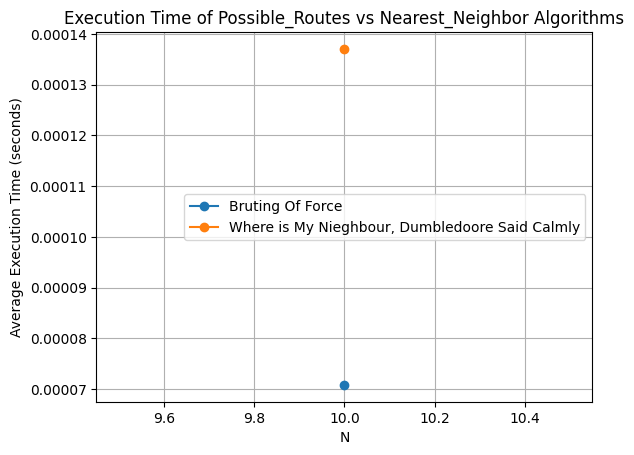

Time Taken: 7.07864761352539e-05
Time Taken: 0.00013706684112548828


In [ ]:
# Ex 4: your code here

def time_of_possible_routes(city_map, N):



  times_taken = []

  for i in range(1, N + 1):

    start = time.time()
    possible_routes(city_map)
    end = time.time()
    timee = end - start;
    times_taken.append(timee)

  return sum(times_taken) / len(times_taken)



def time_of_nearest_neighbour(city_map, N):

  times_taken = []

  for i in range(1, N + 1):

    start = time.time()
    Nearest_Neighbour(city_map)
    end = time.time()
    timee = end - start;
    times_taken.append(timee)

  return sum(times_taken)/ len(times_taken)


poss_routes = time_of_possible_routes(city_map, 10)
nearest = time_of_nearest_neighbour(city_map, 10)


def graph_execution_time(N):

    plt.plot(N, poss_routes, label='Bruting Of Force', marker='o')
    plt.plot(N, nearest, label='Where is My Nieghbour, Dumbledoore Said Calmly', marker='o')
    plt.xlabel('N')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Execution Time of Possible_Routes vs Nearest_Neighbor Algorithms')
    plt.legend()
    plt.grid(True)
    plt.show()


graph_execution_time(10)
print(f"Time Taken: {poss_routes}")
print(f"Time Taken: {nearest}")